In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

In [2]:
#PARAMETROS DO MODELO
D = 0.0039
P = 0.0453
C0 = 8e3
ALPHA = 0.0305
AB = 10

#DOMINIO DO MODELO
L = 2
TF = 80

#DOMÍNIO DISCRETIZADO
N_X = 1000
N_T = TF

#PLANO DE TRATAMENTO DIAS X DOSES
DAYS = [
    [],
    [0,1], # Um dia +1 da dose extra
    [i for i in range(6)], # Dois dias +1 da dose extra
    [i for i in range(21)],
    [i for i in range(28)],
    [i for i in range(35)]
]
DOSES = [
    [],
    [60.0, 4.2],
    [12.2, 12.2, 12.2, 12.2, 12.2, 3.2],
    [2.8, 2.8, 2.8, 2.8, 2.8, 0.0, 0.0, 3.5, 3.5, 3.5, 3.5, 3.5, 0.0, 0.0, 6.5, 6.5, 6.5, 6.5, 6.5, 0.0, 0.0],
    [2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.9, 2.9, 2.9, 2.9, 2.9, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0],
    [1.8, 1.8, 1.8, 1.8, 1.8, 0.0, 0.0, 1.8, 1.8, 1.8, 1.8, 1.8, 0.0, 0.0, 1.8, 1.8, 1.8, 1.8, 1.8, 0.0, 0.0, 1.8, 1.8, 1.8, 1.8, 1.8, 0.0, 0.0, 1.8, 1.8, 1.8, 1.8, 1.8, 0.0, 0.0]
]

#DICIONÁRIO DOS PARÂMETROS
PARAMS = Params(D, P, L, TF, C0, ALPHA, AB)

In [3]:
print(f'-----------------SEM TRATAMENTO---------------------')
X0, T0, SOLUTION0 = Solve(DAYS[0], DOSES[0], PARAMS, N_X, N_T, 10)
#print(f'----------------- TRATAMENTO - 1 DIA ---------------------')
X1, T1, SOLUTION1 = Solve(DAYS[1], DOSES[1], PARAMS, N_X, N_T, 10)
print(f'----------------- TRATAMENTO - 5 DIA ---------------------')
X2, T2, SOLUTION2 = Solve(DAYS[2], DOSES[2], PARAMS, N_X, N_T, 10)
print(f'----------------- TRATAMENTO - 15 DIA ---------------------')
X3, T3, SOLUTION3 = Solve(DAYS[3], DOSES[3], PARAMS, N_X, N_T, 10)
print(f'----------------- TRATAMENTO - 25 DIA ---------------------')
X4, T4, SOLUTION4 = Solve(DAYS[4], DOSES[4], PARAMS, N_X, N_T, 10)
print(f'----------------- TRATAMENTO - 35 DIA ---------------------')
X5, T5, SOLUTION5 = Solve(DAYS[5], DOSES[5], PARAMS, N_X, N_T, 10)

-----------------SEM TRATAMENTO---------------------
Iteração: 0/80
Iteração: 10/80
Iteração: 20/80
Iteração: 30/80
Iteração: 40/80
Iteração: 50/80
Iteração: 60/80
Iteração: 70/80
Iteração: 0/80
Iteração: 10/80
Iteração: 20/80
Iteração: 30/80
Iteração: 40/80
Iteração: 50/80
Iteração: 60/80
Iteração: 70/80
----------------- TRATAMENTO - 5 DIA ---------------------
Iteração: 0/80
Iteração: 10/80
Iteração: 20/80
Iteração: 30/80
Iteração: 40/80
Iteração: 50/80
Iteração: 60/80
Iteração: 70/80
----------------- TRATAMENTO - 15 DIA ---------------------
Iteração: 0/80
Iteração: 10/80
Iteração: 20/80
Iteração: 30/80
Iteração: 40/80
Iteração: 50/80
Iteração: 60/80
Iteração: 70/80
----------------- TRATAMENTO - 25 DIA ---------------------
Iteração: 0/80
Iteração: 10/80
Iteração: 20/80
Iteração: 30/80
Iteração: 40/80
Iteração: 50/80
Iteração: 60/80
Iteração: 70/80
----------------- TRATAMENTO - 35 DIA ---------------------
Iteração: 0/80
Iteração: 10/80
Iteração: 20/80
Iteração: 30/80
Iteração: 

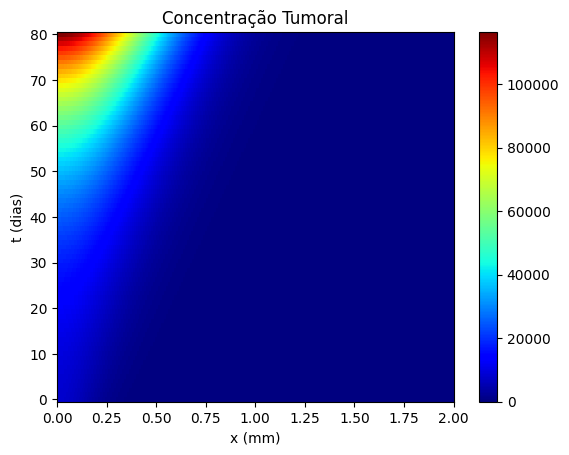

In [4]:
SOLUTION0 = SOLUTION0 * (C0 / L**3)
SOLUTION1 = SOLUTION1 * (C0 / L**3)
SOLUTION2 = SOLUTION2 * (C0 / L**3)
SOLUTION3 = SOLUTION3 * (C0 / L**3)
SOLUTION4 = SOLUTION4 * (C0 / L**3)
SOLUTION5 = SOLUTION5 * (C0 / L**3)


plt.pcolormesh(X0 * L, T0 / P, SOLUTION0, cmap = 'jet')
plt.colorbar()
plt.xlabel('x (mm)')
plt.ylabel('t (dias)')
plt.title('Concentração Tumoral')
plt.show()

/tmp/ipykernel_13660/3009286338.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


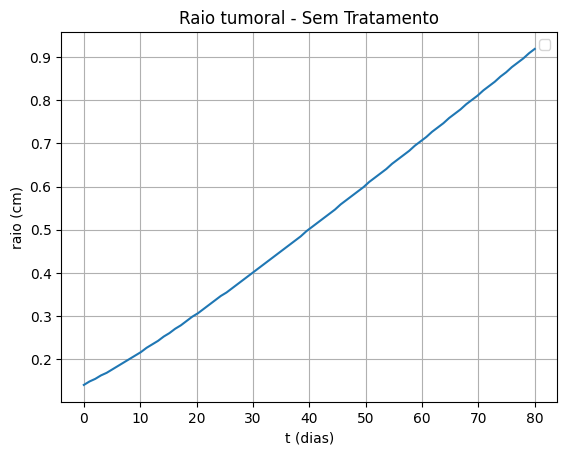

In [10]:
RAIO = Tumor_radius(SOLUTION1, X1, N_X, N_T, PARAMS)
plt.plot(T0 / P, RAIO)
plt.xlabel('t (dias)')
plt.ylabel('raio (cm)')
plt.title('Raio tumoral - Tratamento DOT = 5 dias')
plt.grid()
plt.legend()

plt.show()
    

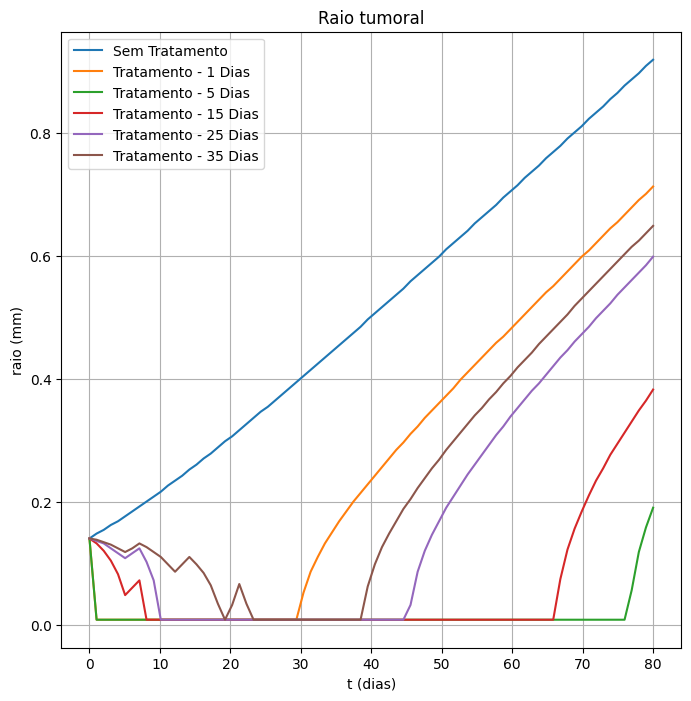

In [6]:
RAIO0 = Tumor_radius(SOLUTION0, X0, N_X, N_T, PARAMS)
RAIO1 = Tumor_radius(SOLUTION1, X1, N_X, N_T, PARAMS)
RAIO2 = Tumor_radius(SOLUTION2, X2, N_X, N_T, PARAMS)
RAIO3 = Tumor_radius(SOLUTION3, X3, N_X, N_T, PARAMS)
RAIO4 = Tumor_radius(SOLUTION4, X4, N_X, N_T, PARAMS)
RAIO5 = Tumor_radius(SOLUTION5, X5, N_X, N_T, PARAMS)
        

plt.figure(figsize = (8, 8))
plt.plot(T0 / P, RAIO0, label = 'Sem Tratamento')
plt.plot(T1 / P, RAIO1, label = 'Tratamento - 1 Dias')
plt.plot(T2 / P, RAIO2, label = 'Tratamento - 5 Dias')
plt.plot(T3 / P, RAIO3, label = 'Tratamento - 15 Dias')
plt.plot(T4 / P, RAIO4, label = 'Tratamento - 25 Dias')
plt.plot(T5 / P, RAIO5, label = 'Tratamento - 35 Dias')
plt.xlabel('t (dias)')
plt.ylabel('raio (mm)')
plt.title('Raio tumoral')
plt.grid()
plt.legend()
plt.show()
    